In [28]:
from modules.golomb_simple import orbital_golomb_array

def print_resoult(udp : orbital_golomb_array, x_solution,  image_path : str = "../data/nebula.jpg", N_obs : int = 300) :
    fit_0 = udp.fitness(x_solution)[0]
    fit_1 = fit_0 + 1
    print("solution: ", x_solution)
    print("wrost Fill factor: {:.5f}".format(fit_0), " ,\t wrost Empty factor(?) : {:.5f}".format(fit_1))
    udp.plot(x_solution, figsize=(25,7))
    udp.plot_simulated_reconstruction(x_solution,image_path=image_path, N_obs=300)
    return

1 OBIETTIVO

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      1 |             - |             -
     2 |      200 |      1 |  0.000000E+00 |             f
     3 |      300 |      2 |  0.000000E+00 |             f
     4 |      400 |      4 |  0.000000E+00 |             f
     5 |      500 |      1 |  0.0181405896 |         ideal
     6 |      600 |      2 |  0.000000E+00 |             f
     7 |      700 |      1 |  0.0090702948 |         ideal
     8 |      800 |      2 |  0.000000E+00 |             f
     9 |      900 |      1 |  0.0272108844 |         ideal
    10 |     1000 |      1 |  0.000000E+00 |             f
    11 |     1100 |      2 |  0.000000E+00 |             f
    12 |     1200 |      1 |  0.0090702948 |         ideal
    13 |     1300 |      1 |  0.000000E+00 |             f
    14 |     1400 |      1 |  0.000000E+00 |             f
    15 |     1500 |      1 |  0.0045351474 |         ideal
    16 |     1600 |      2 |  0.000000E+00 |            

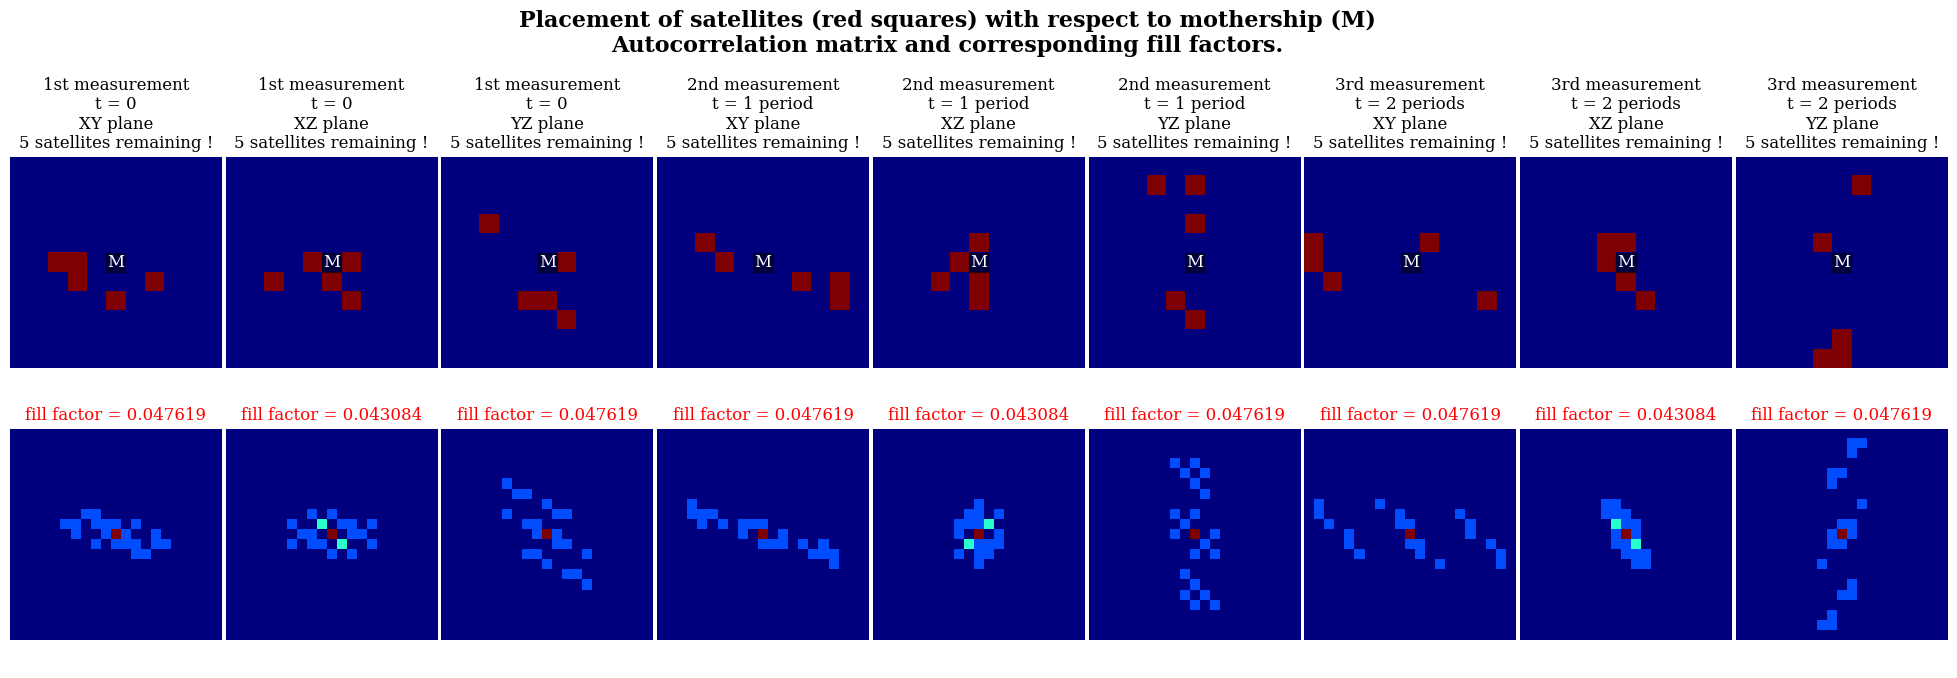

XY


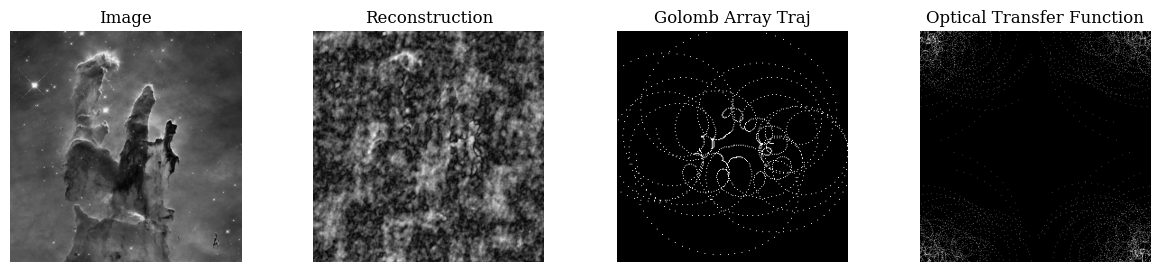

XZ


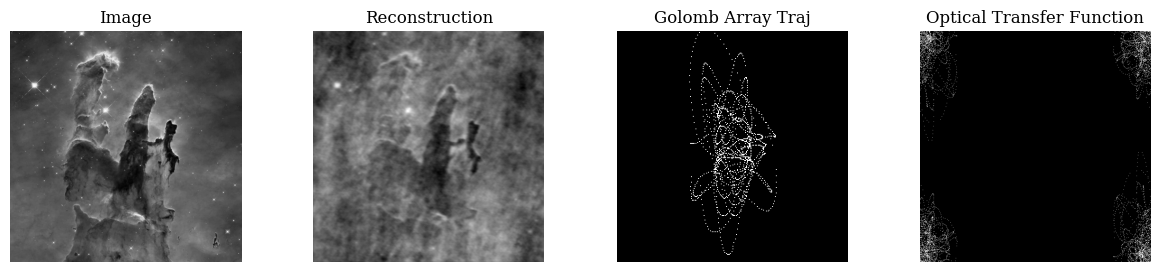

YZ


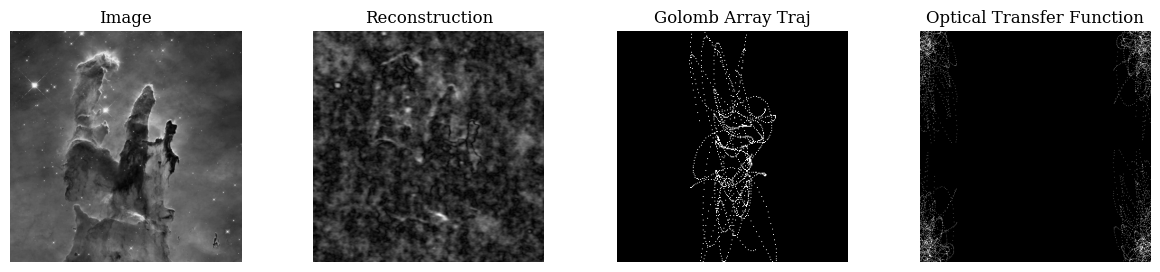

In [32]:
import numpy as np
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from modules.plotter import print_resoult
from modules.golomb_simple import init_simple_problem

# Inizializza il problema semplice Golomb
UDP = init_simple_problem()
img = "/home/mott/ESA_Interferometric_Mission/data/nebula.jpg"  # Percorso dell'immagine

# Classe per il problema di ottimizzazione con NSGA-II
class GolombOptimization(Problem):
    def __init__(self, udp):
        super().__init__(n_var=udp.n_sat * 6,  # numero di variabili: posizioni e velocità
                         n_obj=1,              # un solo obiettivo
                         n_constr=0,           # nessun vincolo
                         xl=-0.5,              # limite inferiore
                         xu=0.5)               # limite superiore
        self.udp = udp

    def _evaluate(self, x, out, *args, **kwargs):
        """
        Calcola il fitness per ogni soluzione
        """
        fitness_values = []
        for solution in x:
            fitness = self.udp.fitness(solution)[0]  # Utilizziamo la funzione di fitness preesistente in UDP
            fitness_values.append(fitness)
        out["F"] = np.array(fitness_values).reshape(-1, 1)  # Restituisce il fitness

def run_and_display_nsga2(udp, n_generations=100, population_size=100, image_path=img):
    """
    Configura, esegue l'algoritmo NSGA-II e visualizza i risultati
    """
    # Configura il problema
    problem = GolombOptimization(udp)

    # Configura l'algoritmo NSGA-II
    algorithm = NSGA2(
        pop_size=population_size,
        crossover_probability=0.9,  # Aumentiamo la probabilità di crossover
        mutation_probability=0.2,   # Probabilità di mutazione
        mutation_type="polynomial",  # Tipo di mutazione
        crossover_type="uniform",   # Tipo di crossover
        eliminate_duplicates=True   # Elimina duplicati per migliorare la diversità
    )

    # Condizioni di terminazione
    termination = ('n_gen', n_generations)

    # Esegui l'ottimizzazione
    res = minimize(problem, algorithm, termination, seed=1, verbose=True)

    # Visualizza tutte le soluzioni trovate
    print("\nTutte le soluzioni trovate (Fronte di Pareto):\n")
    for i, (sol, fit) in enumerate(zip(res.X, res.F)):
        print(f"Soluzione {i + 1}:")
        print(f"X = {sol}")
        print(f"Fitness = {fit[0]:.4f}\n")

    # Seleziona la migliore soluzione
    best_solution_idx = np.argmax(-res.F[:, 0])
    best_solution = res.X[best_solution_idx]
    best_fitness = -res.F[best_solution_idx, 0]

    print("\nMigliore soluzione trovata:")
    print(f"X = {best_solution}")
    print(f"Valore fitness = {best_fitness:.4f}")

    # Visualizza i risultati con print_resoult
    print_resoult(udp, best_solution, 300, image_path=image_path)

    # Visualizza il fronte di Pareto
    plot = Scatter()
    plot.add(res.F, label="Fronte di Pareto")
    plot.show()

# Esegui il codice principale
if __name__ == "__main__":
    # Esegui l'ottimizzazione e visualizza i risultati
    run_and_display_nsga2(UDP, n_generations=200, population_size=100, image_path=img)


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      1 |             - |             -
     2 |      200 |      1 |  0.000000E+00 |             f
     3 |      300 |      2 |  0.000000E+00 |             f
     4 |      400 |      4 |  0.000000E+00 |             f
     5 |      500 |      1 |  0.0181405896 |         ideal
     6 |      600 |      2 |  0.000000E+00 |             f
     7 |      700 |      1 |  0.0090702948 |         ideal
     8 |      800 |      2 |  0.000000E+00 |             f
     9 |      900 |      1 |  0.0272108844 |         ideal
    10 |     1000 |      1 |  0.000000E+00 |             f
    11 |     1100 |      2 |  0.000000E+00 |             f
    12 |     1200 |      1 |  0.0090702948 |         ideal
    13 |     1300 |      1 |  0.000000E+00 |             f
    14 |     1400 |      1 |  0.000000E+00 |             f
    15 |     1500 |      1 |  0.0045351474 |         ideal
    16 |     1600 |      2 |  0.000000E+00 |            

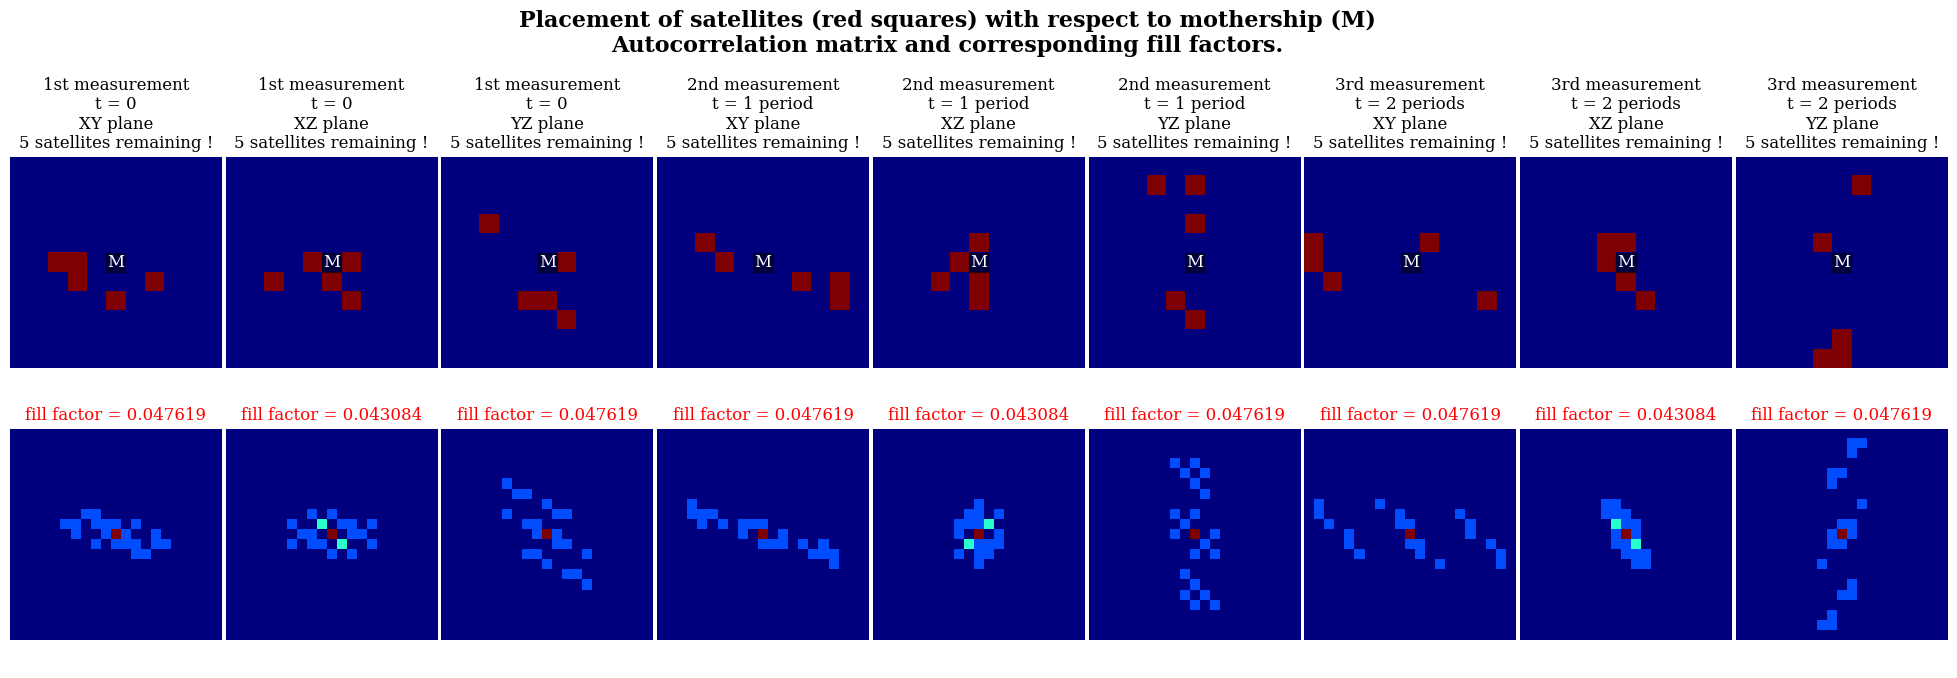

XY


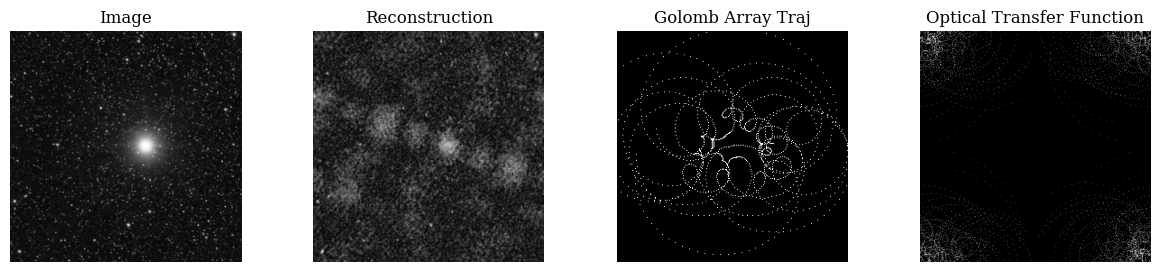

XZ


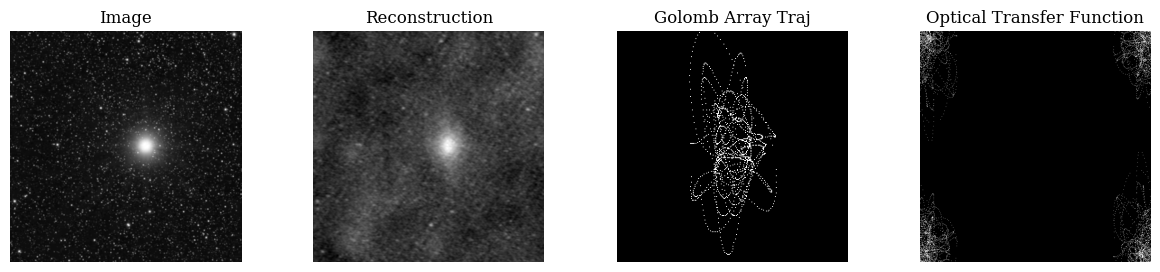

YZ


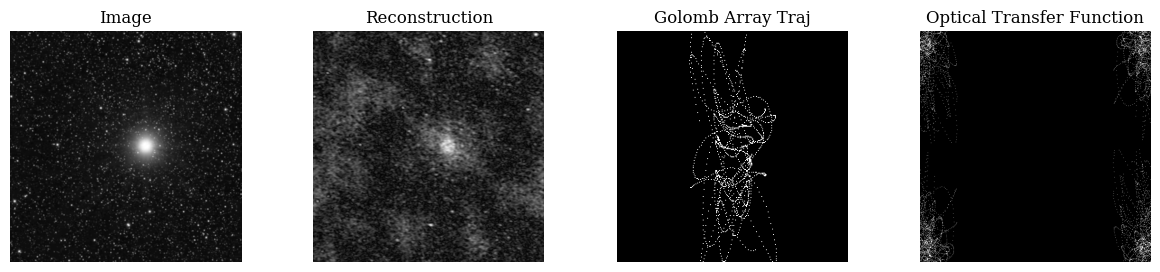

In [31]:
import numpy as np
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from modules.plotter import print_resoult
from modules.golomb_simple import init_simple_problem

# Inizializza il problema semplice Golomb
UDP = init_simple_problem()
img = "/home/mott/ESA_Interferometric_Mission/data/star.jpg"  # Percorso dell'immagine

# Classe per il problema di ottimizzazione con NSGA-II
class GolombOptimization(Problem):
    def __init__(self, udp):
        super().__init__(n_var=udp.n_sat * 6,  # numero di variabili: posizioni e velocità
                         n_obj=1,              # un solo obiettivo
                         n_constr=0,           # nessun vincolo
                         xl=-0.5,              # limite inferiore
                         xu=0.5)               # limite superiore
        self.udp = udp

    def _evaluate(self, x, out, *args, **kwargs):
        """
        Calcola il fitness per ogni soluzione
        """
        fitness_values = []
        for solution in x:
            fitness = self.udp.fitness(solution)[0]  # Utilizziamo la funzione di fitness preesistente in UDP
            fitness_values.append(fitness)
        out["F"] = np.array(fitness_values).reshape(-1, 1)  # Restituisce il fitness

def run_and_display_nsga2(udp, n_generations=100, population_size=100, image_path=img):
    """
    Configura, esegue l'algoritmo NSGA-II e visualizza i risultati
    """
    # Configura il problema
    problem = GolombOptimization(udp)

    # Configura l'algoritmo NSGA-II
    algorithm = NSGA2(
        pop_size=population_size,
        crossover_probability=0.9,  # Aumentiamo la probabilità di crossover
        mutation_probability=0.2,   # Probabilità di mutazione
        mutation_type="polynomial",  # Tipo di mutazione
        crossover_type="uniform",   # Tipo di crossover
        eliminate_duplicates=True   # Elimina duplicati per migliorare la diversità
    )

    # Condizioni di terminazione
    termination = ('n_gen', n_generations)

    # Esegui l'ottimizzazione
    res = minimize(problem, algorithm, termination, seed=1, verbose=True)

    # Visualizza tutte le soluzioni trovate
    print("\nTutte le soluzioni trovate (Fronte di Pareto):\n")
    for i, (sol, fit) in enumerate(zip(res.X, res.F)):
        print(f"Soluzione {i + 1}:")
        print(f"X = {sol}")
        print(f"Fitness = {fit[0]:.4f}\n")

    # Seleziona la migliore soluzione
    best_solution_idx = np.argmax(-res.F[:, 0])
    best_solution = res.X[best_solution_idx]
    best_fitness = -res.F[best_solution_idx, 0]

    print("\nMigliore soluzione trovata:")
    print(f"X = {best_solution}")
    print(f"Valore fitness = {best_fitness:.4f}")

    # Visualizza i risultati con print_resoult
    print_resoult(udp, best_solution, 300, image_path=image_path)

    # Visualizza il fronte di Pareto
    plot = Scatter()
    plot.add(res.F, label="Fronte di Pareto")
    plot.show()

# Esegui il codice principale
if __name__ == "__main__":
    # Esegui l'ottimizzazione e visualizza i risultati
    run_and_display_nsga2(UDP, n_generations=200, population_size=100, image_path=img)
